In [124]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

RANDOM_SEED = 42
NUM_CLASSES = 27
datapath = 'alphabets.csv'
model_save_path = 'alpha_classifier.hdf5'

In [128]:
X_dataset = np.loadtxt(datapath, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(datapath, delimiter=',', dtype='int32', usecols=(0))

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.90, random_state=RANDOM_SEED)
y_train

array([21, 24, 23, ...,  9,  1, 13])

In [130]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(82, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_27 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 82)                3526      
_________________________________________________________________
dropout_28 (Dropout)         (None, 82)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 42)                3486      
_________________________________________________________________
dense_59 (Dense)             (None, 27)                1161      
Total params: 9,979
Trainable params: 9,979
Non-trainable params: 0
___________________________________________________

In [131]:
# Model early stopping callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') >= 0.99 and logs.get('accuracy') >= 0.99): # Experiment with changing this value
      print("\nReached 99% Training Accuracy and 99% Validation Accuracy so cancelling training!")
      self.model.stop_training = True

es_callbacks = myCallback()

# Model checkpoint callback

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

In [132]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [133]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks= [cp_callback, es_callbacks]
)

Epoch 1/1000
256/256 [==============================] - 1s 3ms/step - loss: 2.9093 - accuracy: 0.1521 - val_loss: 1.9211 - val_accuracy: 0.4152

Epoch 00001: saving model to alpha_classifier.hdf5
Epoch 2/1000
256/256 [==============================] - 1s 2ms/step - loss: 1.5872 - accuracy: 0.4459 - val_loss: 1.0482 - val_accuracy: 0.6365

Epoch 00002: saving model to alpha_classifier.hdf5
Epoch 3/1000
256/256 [==============================] - 0s 2ms/step - loss: 1.1313 - accuracy: 0.5786 - val_loss: 0.7929 - val_accuracy: 0.7036

Epoch 00003: saving model to alpha_classifier.hdf5
Epoch 4/1000
256/256 [==============================] - 0s 2ms/step - loss: 0.9218 - accuracy: 0.6511 - val_loss: 0.6105 - val_accuracy: 0.7906

Epoch 00004: saving model to alpha_classifier.hdf5
Epoch 5/1000
256/256 [==============================] - 0s 2ms/step - loss: 0.7920 - accuracy: 0.6956 - val_loss: 0.5081 - val_accuracy: 0.8104

Epoch 00005: saving model to alpha_classifier.hdf5
Epoch 6/1000
256/256


Epoch 00042: saving model to alpha_classifier.hdf5
Epoch 43/1000
256/256 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9353 - val_loss: 0.0639 - val_accuracy: 0.9843

Epoch 00043: saving model to alpha_classifier.hdf5
Epoch 44/1000
256/256 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9361 - val_loss: 0.0670 - val_accuracy: 0.9818

Epoch 00044: saving model to alpha_classifier.hdf5
Epoch 45/1000
256/256 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9404 - val_loss: 0.0741 - val_accuracy: 0.9750

Epoch 00045: saving model to alpha_classifier.hdf5
Epoch 46/1000
256/256 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.9397 - val_loss: 0.0718 - val_accuracy: 0.9750

Epoch 00046: saving model to alpha_classifier.hdf5
Epoch 47/1000
256/256 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9396 - val_loss: 0.0544 - val_accuracy: 0.9873

Epoch 00047: s

256/256 [==============================] - 1s 2ms/step - loss: 0.1152 - accuracy: 0.9627 - val_loss: 0.0306 - val_accuracy: 0.9912

Epoch 00084: saving model to alpha_classifier.hdf5
Epoch 85/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.1252 - accuracy: 0.9593 - val_loss: 0.0278 - val_accuracy: 0.9939

Epoch 00085: saving model to alpha_classifier.hdf5
Epoch 86/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.1146 - accuracy: 0.9636 - val_loss: 0.0364 - val_accuracy: 0.9895

Epoch 00086: saving model to alpha_classifier.hdf5
Epoch 87/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.1216 - accuracy: 0.9616 - val_loss: 0.0349 - val_accuracy: 0.9904

Epoch 00087: saving model to alpha_classifier.hdf5
Epoch 88/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.1176 - accuracy: 0.9639 - val_loss: 0.0337 - val_accuracy: 0.9890

Epoch 00088: saving model to alpha_classifier.hdf5
Epoch 89/1000
256/256 [======

256/256 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.9729 - val_loss: 0.0561 - val_accuracy: 0.9810

Epoch 00125: saving model to alpha_classifier.hdf5
Epoch 126/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0952 - accuracy: 0.9702 - val_loss: 0.0274 - val_accuracy: 0.9915

Epoch 00126: saving model to alpha_classifier.hdf5
Epoch 127/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.1008 - accuracy: 0.9668 - val_loss: 0.0168 - val_accuracy: 0.9961

Epoch 00127: saving model to alpha_classifier.hdf5
Epoch 128/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0941 - accuracy: 0.9712 - val_loss: 0.0208 - val_accuracy: 0.9959

Epoch 00128: saving model to alpha_classifier.hdf5
Epoch 129/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0940 - accuracy: 0.9703 - val_loss: 0.0271 - val_accuracy: 0.9923

Epoch 00129: saving model to alpha_classifier.hdf5
Epoch 130/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9741 - val_loss: 0.0164 - val_accuracy: 0.9950

Epoch 00166: saving model to alpha_classifier.hdf5
Epoch 167/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9736 - val_loss: 0.0193 - val_accuracy: 0.9945

Epoch 00167: saving model to alpha_classifier.hdf5
Epoch 168/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9740 - val_loss: 0.0185 - val_accuracy: 0.9950

Epoch 00168: saving model to alpha_classifier.hdf5
Epoch 169/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9754 - val_loss: 0.0236 - val_accuracy: 0.9928

Epoch 00169: saving model to alpha_classifier.hdf5
Epoch 170/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0783 - accuracy: 0.9757 - val_loss: 0.0259 - val_accuracy: 0.9923

Epoch 00170: saving model to alpha_classifier.hdf5
Epoch 171/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9771 - val_loss: 0.0127 - val_accuracy: 0.9970

Epoch 00207: saving model to alpha_classifier.hdf5
Epoch 208/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0686 - accuracy: 0.9769 - val_loss: 0.0203 - val_accuracy: 0.9926

Epoch 00208: saving model to alpha_classifier.hdf5
Epoch 209/1000
256/256 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9782 - val_loss: 0.0140 - val_accuracy: 0.9959

Epoch 00209: saving model to alpha_classifier.hdf5
Epoch 210/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9742 - val_loss: 0.0161 - val_accuracy: 0.9950

Epoch 00210: saving model to alpha_classifier.hdf5
Epoch 211/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9773 - val_loss: 0.0202 - val_accuracy: 0.9934

Epoch 00211: saving model to alpha_classifier.hdf5
Epoch 212/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0659 - accuracy: 0.9791 - val_loss: 0.0236 - val_accuracy: 0.9959

Epoch 00248: saving model to alpha_classifier.hdf5
Epoch 249/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.0176 - val_accuracy: 0.9972

Epoch 00249: saving model to alpha_classifier.hdf5
Epoch 250/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0580 - accuracy: 0.9804 - val_loss: 0.0183 - val_accuracy: 0.9948

Epoch 00250: saving model to alpha_classifier.hdf5
Epoch 251/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9808 - val_loss: 0.0128 - val_accuracy: 0.9972

Epoch 00251: saving model to alpha_classifier.hdf5
Epoch 252/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0130 - val_accuracy: 0.9959

Epoch 00252: saving model to alpha_classifier.hdf5
Epoch 253/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0574 - accuracy: 0.9818 - val_loss: 0.0113 - val_accuracy: 0.9970

Epoch 00289: saving model to alpha_classifier.hdf5
Epoch 290/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0608 - accuracy: 0.9798 - val_loss: 0.0276 - val_accuracy: 0.9909

Epoch 00290: saving model to alpha_classifier.hdf5
Epoch 291/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9804 - val_loss: 0.0100 - val_accuracy: 0.9978

Epoch 00291: saving model to alpha_classifier.hdf5
Epoch 292/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0599 - accuracy: 0.9807 - val_loss: 0.0148 - val_accuracy: 0.9964

Epoch 00292: saving model to alpha_classifier.hdf5
Epoch 293/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0544 - accuracy: 0.9822 - val_loss: 0.0132 - val_accuracy: 0.9959

Epoch 00293: saving model to alpha_classifier.hdf5
Epoch 294/1000
256/256 [=

256/256 [==============================] - 1s 3ms/step - loss: 0.0601 - accuracy: 0.9808 - val_loss: 0.0101 - val_accuracy: 0.9975

Epoch 00330: saving model to alpha_classifier.hdf5
Epoch 331/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0560 - accuracy: 0.9818 - val_loss: 0.0123 - val_accuracy: 0.9972

Epoch 00331: saving model to alpha_classifier.hdf5
Epoch 332/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0555 - accuracy: 0.9829 - val_loss: 0.0122 - val_accuracy: 0.9967

Epoch 00332: saving model to alpha_classifier.hdf5
Epoch 333/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0546 - accuracy: 0.9821 - val_loss: 0.0195 - val_accuracy: 0.9945

Epoch 00333: saving model to alpha_classifier.hdf5
Epoch 334/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0544 - accuracy: 0.9823 - val_loss: 0.0094 - val_accuracy: 0.9972

Epoch 00334: saving model to alpha_classifier.hdf5
Epoch 335/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.0224 - val_accuracy: 0.9942

Epoch 00371: saving model to alpha_classifier.hdf5
Epoch 372/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0488 - accuracy: 0.9837 - val_loss: 0.0159 - val_accuracy: 0.9948

Epoch 00372: saving model to alpha_classifier.hdf5
Epoch 373/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0573 - accuracy: 0.9816 - val_loss: 0.0122 - val_accuracy: 0.9975

Epoch 00373: saving model to alpha_classifier.hdf5
Epoch 374/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.0108 - val_accuracy: 0.9964

Epoch 00374: saving model to alpha_classifier.hdf5
Epoch 375/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0512 - accuracy: 0.9831 - val_loss: 0.0101 - val_accuracy: 0.9978

Epoch 00375: saving model to alpha_classifier.hdf5
Epoch 376/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.0111 - val_accuracy: 0.9970

Epoch 00412: saving model to alpha_classifier.hdf5
Epoch 413/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.9839 - val_loss: 0.0108 - val_accuracy: 0.9967

Epoch 00413: saving model to alpha_classifier.hdf5
Epoch 414/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0456 - accuracy: 0.9844 - val_loss: 0.0122 - val_accuracy: 0.9964

Epoch 00414: saving model to alpha_classifier.hdf5
Epoch 415/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0472 - accuracy: 0.9851 - val_loss: 0.0116 - val_accuracy: 0.9975

Epoch 00415: saving model to alpha_classifier.hdf5
Epoch 416/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0508 - accuracy: 0.9839 - val_loss: 0.0130 - val_accuracy: 0.9956

Epoch 00416: saving model to alpha_classifier.hdf5
Epoch 417/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0444 - accuracy: 0.9859 - val_loss: 0.0105 - val_accuracy: 0.9972

Epoch 00453: saving model to alpha_classifier.hdf5
Epoch 454/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0481 - accuracy: 0.9836 - val_loss: 0.0142 - val_accuracy: 0.9961

Epoch 00454: saving model to alpha_classifier.hdf5
Epoch 455/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0441 - accuracy: 0.9859 - val_loss: 0.0144 - val_accuracy: 0.9964

Epoch 00455: saving model to alpha_classifier.hdf5
Epoch 456/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0472 - accuracy: 0.9849 - val_loss: 0.0207 - val_accuracy: 0.9942

Epoch 00456: saving model to alpha_classifier.hdf5
Epoch 457/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0481 - accuracy: 0.9840 - val_loss: 0.0079 - val_accuracy: 0.9986

Epoch 00457: saving model to alpha_classifier.hdf5
Epoch 458/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9841 - val_loss: 0.0083 - val_accuracy: 0.9975

Epoch 00494: saving model to alpha_classifier.hdf5
Epoch 495/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0122 - val_accuracy: 0.9975

Epoch 00495: saving model to alpha_classifier.hdf5
Epoch 496/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0499 - accuracy: 0.9832 - val_loss: 0.0134 - val_accuracy: 0.9967

Epoch 00496: saving model to alpha_classifier.hdf5
Epoch 497/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0435 - accuracy: 0.9861 - val_loss: 0.0107 - val_accuracy: 0.9972

Epoch 00497: saving model to alpha_classifier.hdf5
Epoch 498/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0474 - accuracy: 0.9839 - val_loss: 0.0092 - val_accuracy: 0.9975

Epoch 00498: saving model to alpha_classifier.hdf5
Epoch 499/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0416 - accuracy: 0.9872 - val_loss: 0.0117 - val_accuracy: 0.9970

Epoch 00535: saving model to alpha_classifier.hdf5
Epoch 536/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0403 - accuracy: 0.9869 - val_loss: 0.0319 - val_accuracy: 0.9876

Epoch 00536: saving model to alpha_classifier.hdf5
Epoch 537/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0475 - accuracy: 0.9850 - val_loss: 0.0105 - val_accuracy: 0.9967

Epoch 00537: saving model to alpha_classifier.hdf5
Epoch 538/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0435 - accuracy: 0.9856 - val_loss: 0.0094 - val_accuracy: 0.9978

Epoch 00538: saving model to alpha_classifier.hdf5
Epoch 539/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0431 - accuracy: 0.9872 - val_loss: 0.0138 - val_accuracy: 0.9956

Epoch 00539: saving model to alpha_classifier.hdf5
Epoch 540/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0414 - accuracy: 0.9861 - val_loss: 0.0124 - val_accuracy: 0.9964

Epoch 00576: saving model to alpha_classifier.hdf5
Epoch 577/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0057 - val_accuracy: 0.9983

Epoch 00577: saving model to alpha_classifier.hdf5
Epoch 578/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0445 - accuracy: 0.9858 - val_loss: 0.0079 - val_accuracy: 0.9975

Epoch 00578: saving model to alpha_classifier.hdf5
Epoch 579/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.0177 - val_accuracy: 0.9937

Epoch 00579: saving model to alpha_classifier.hdf5
Epoch 580/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0372 - accuracy: 0.9874 - val_loss: 0.0091 - val_accuracy: 0.9967

Epoch 00580: saving model to alpha_classifier.hdf5
Epoch 581/1000
256/256 [=

256/256 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9868 - val_loss: 0.0140 - val_accuracy: 0.9945

Epoch 00617: saving model to alpha_classifier.hdf5
Epoch 618/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0415 - accuracy: 0.9875 - val_loss: 0.0176 - val_accuracy: 0.9964

Epoch 00618: saving model to alpha_classifier.hdf5
Epoch 619/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0160 - val_accuracy: 0.9956

Epoch 00619: saving model to alpha_classifier.hdf5
Epoch 620/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0086 - val_accuracy: 0.9975

Epoch 00620: saving model to alpha_classifier.hdf5
Epoch 621/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0085 - val_accuracy: 0.9983

Epoch 00621: saving model to alpha_classifier.hdf5
Epoch 622/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0106 - val_accuracy: 0.9970

Epoch 00658: saving model to alpha_classifier.hdf5
Epoch 659/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.0122 - val_accuracy: 0.9981

Epoch 00659: saving model to alpha_classifier.hdf5
Epoch 660/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.0112 - val_accuracy: 0.9967

Epoch 00660: saving model to alpha_classifier.hdf5
Epoch 661/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0429 - accuracy: 0.9864 - val_loss: 0.0064 - val_accuracy: 0.9981

Epoch 00661: saving model to alpha_classifier.hdf5
Epoch 662/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0086 - val_accuracy: 0.9978

Epoch 00662: saving model to alpha_classifier.hdf5
Epoch 663/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0346 - accuracy: 0.9886 - val_loss: 0.0083 - val_accuracy: 0.9972

Epoch 00699: saving model to alpha_classifier.hdf5
Epoch 700/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.0115 - val_accuracy: 0.9967

Epoch 00700: saving model to alpha_classifier.hdf5
Epoch 701/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9876 - val_loss: 0.0131 - val_accuracy: 0.9953

Epoch 00701: saving model to alpha_classifier.hdf5
Epoch 702/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.0113 - val_accuracy: 0.9956

Epoch 00702: saving model to alpha_classifier.hdf5
Epoch 703/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0108 - val_accuracy: 0.9975

Epoch 00703: saving model to alpha_classifier.hdf5
Epoch 704/1000
256/256 [=

256/256 [==============================] - 2s 6ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.0176 - val_accuracy: 0.9948

Epoch 00740: saving model to alpha_classifier.hdf5
Epoch 741/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.0103 - val_accuracy: 0.9989

Epoch 00741: saving model to alpha_classifier.hdf5
Epoch 742/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0053 - val_accuracy: 0.9981

Epoch 00742: saving model to alpha_classifier.hdf5
Epoch 743/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0321 - accuracy: 0.9895 - val_loss: 0.0145 - val_accuracy: 0.9948

Epoch 00743: saving model to alpha_classifier.hdf5
Epoch 744/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0121 - val_accuracy: 0.9964

Epoch 00744: saving model to alpha_classifier.hdf5
Epoch 745/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0079 - val_accuracy: 0.9981

Epoch 00781: saving model to alpha_classifier.hdf5
Epoch 782/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.9874 - val_loss: 0.0129 - val_accuracy: 0.9950

Epoch 00782: saving model to alpha_classifier.hdf5
Epoch 783/1000
256/256 [==============================] - 1s 4ms/step - loss: 0.0380 - accuracy: 0.9876 - val_loss: 0.0101 - val_accuracy: 0.9972

Epoch 00783: saving model to alpha_classifier.hdf5
Epoch 784/1000
256/256 [==============================] - 1s 4ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0080 - val_accuracy: 0.9975

Epoch 00784: saving model to alpha_classifier.hdf5
Epoch 785/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.0323 - accuracy: 0.9892 - val_loss: 0.0103 - val_accuracy: 0.9978

Epoch 00785: saving model to alpha_classifier.hdf5
Epoch 786/1000
256/256 [=

256/256 [==============================] - 1s 2ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0101 - val_accuracy: 0.9972

Epoch 00822: saving model to alpha_classifier.hdf5
Epoch 823/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0076 - val_accuracy: 0.9981

Epoch 00823: saving model to alpha_classifier.hdf5
Epoch 824/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0381 - accuracy: 0.9875 - val_loss: 0.0105 - val_accuracy: 0.9961

Epoch 00824: saving model to alpha_classifier.hdf5
Epoch 825/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0391 - accuracy: 0.9872 - val_loss: 0.0099 - val_accuracy: 0.9975

Epoch 00825: saving model to alpha_classifier.hdf5
Epoch 826/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0138 - val_accuracy: 0.9970

Epoch 00826: saving model to alpha_classifier.hdf5
Epoch 827/1000
256/256 [=

In [134]:
#load the model
model = tf.keras.models.load_model(model_save_path)

In [137]:
#prediction
jes = 700
predict_result = model.predict(np.array([X_test[jes]]))
print(f'Original Jesture = {y_test[jes]}', f'\nPredicted Jesture = {np.argmax(np.squeeze(predict_result))}')

Original Jesture = 12 
Predicted Jesture = 12


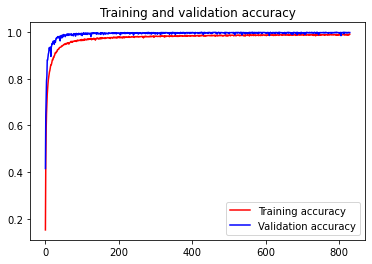

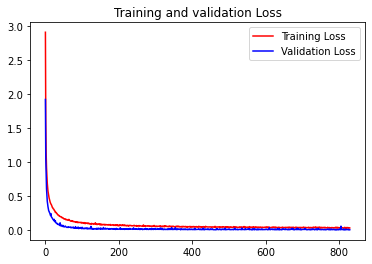

<Figure size 432x288 with 0 Axes>

In [138]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()